# Chapter 3: Classification 
___

Classification tasks represent one pillar of machine learning. In this chapter, we will uncover in greater depths what they are and how we should approach them. 

## 1. A Famous Classification Dataset: `MNIST`

### 1.1. Loading `mnist`

This dataset contains $70,000$ labelled handwritten digits. The purpose is to create an algorithm able to recognize the digits. 

The first steo is to load the data using `scikit-learn`: 

In [2]:
from sklearn.datasets import fetch_openml

# the dataset: 
mnist = fetch_openml('mnist_784', as_frame = False) # as_frame = False to get numpy arrays since a df would be useless here

# the data:
X, y = mnist['data'], mnist['target']

print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


For the `y` array, it is pretty straightforward to understand what we get: an array with all the labels. However, for understanding `X`, we should inspect its dimensions: 

In [3]:
X.shape

(70000, 784)

First, we see that we have $70000$ rows and each row has $784$ features. Here is the explanation: 
+ One row is one digit.
+ The digits are a picture consisting of 28x28 pixels, i.e. $748$ pixels which store the pixel's intensity ranging from $0$ (white) to $255$ (black).

Now, we will visualize one of these digits: 

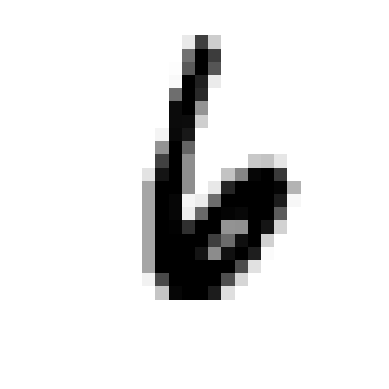

In [4]:
import matplotlib.pyplot as plt

# we build a function to plot a digit
def plot_digit(image_data): 
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary') # cmap = 'binary' to get a black and white image
    plt.axis('off')
    plt.show()

# let's plot a digit
plot_digit(X[204])



Now, if we inspect the label of the $204$-th feature: 

In [5]:
y[204]

'6'

### 1.2. Train Set & Test Set

Finally, before inspecting the data further, we should save a test set. Fortunately, the `mnist` dataset is very didactical and has already been approrpriately shuffled for us. The first $60,000$ observations are the train set: 

In [6]:
# split the data into training and testing sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Thus, we have $60,000$ observations for training: 

In [7]:
X_train.shape

(60000, 784)

### 1.3. Inspecting the Digits

Now, we inspect few more digits with a new function:    

In [8]:
import numpy as np

def plot_digits(X): 
    n = len(X)
    rows = int(np.ceil(np.sqrt(n)))
    cols = int(np.ceil(n / rows))
    count = 0

    fig, ax = plt.subplots(rows, cols, figsize = (cols, rows))
    for row in range(rows):
        for col in range(cols):
            
            # prevent errors: 
            if count == n: 
                break

            ax[row, col].imshow(X[row * cols + col].reshape(28, 28), cmap = 'binary')
            ax[row, col].axis('off')
            count += 1
  
    
    plt.show()
       

Now, we choose a sample to print the first $36$ digits:

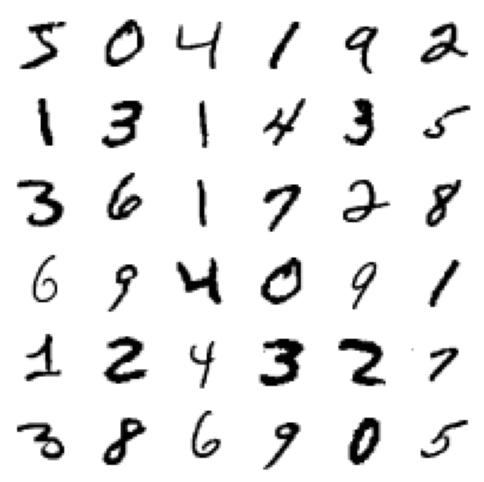

In [9]:
plot_digits(X_train[:36])

## 2. Training a Binary Classifier

### 2.1. The Model 

For this first step, we will only build a program that can recognizes whether a given number is a five or not. Again, the following chapters will uncover in more detail the mathematics and the algrithms behind what we are doing right now. The focus of this section is rather oriented on learning how to evaluate classification models. 

Since we want a binary classifier, let's focus on a classifier that either outputs `True` if it identifies a $5$ or `False` if it is something else. 

Let's build our boolean vectors: 

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

Now we pick a classifier `SDGClassifier()`, which is based on stochastic gradient descent, thus effective for handling large datasets, and train it on the `train_sets`: 

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Before delving into how we can evaluate the model performances at this particular task, let's make a prediction on a random sample: 

In [12]:
import random as rn 

# we generate 10 random digits
rn.seed(42)
digits = rn.sample(range(0, 60000), 10)
digits

# we predict if the digits are 5s
preds = sgd_clf.predict(X_train[digits])
print(preds)

# we check the actual values
y_train[digits]

[False False False False False False  True False False False]


array(['9', '4', '7', '2', '9', '7', '5', '6', '9', '9'], dtype=object)

Woow! It looks like this model is performing quite well since it rightfully detected the $5$ in a random sample of $10$ elements. But are we really convinced by the performances of this model. Is there a way to evaluate more systematically the model's performances?

### 2.2. Performance Measures

Oftentimes, evaluating a classifier is much trickier than evaluating a regressor. This is the reason why we we spend quite some time in this section to wrap our head around this particular issue. 

#### 2.2.1. Measuirng Accuracy Using Cross-Validation

A good way to evaluate a model is to use cross validation, as we did in chapter 2 with our regression project. We can proceed like this: 

In [13]:
from sklearn.model_selection import cross_val_score

score_cv3 = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')
float(score_cv3.mean())

0.9570333333333334

Now, even with cross validation, our model seems to be really good since it has over a $95$% accuracy. However, are we really sure that it is that good? To examine this statement, we can compare the performances of this model against the ones of a very simple model named `DummyClassifier()`. Basically, this model classifies every image on the most frequent class. Therefore, since we have a lot more `False` than `True`, the `DummyClassifier()` will only predict `False`: 

In [14]:
from sklearn.dummy import DummyClassifier

# we train the dummy classifier
dum_clf = DummyClassifier(strategy = 'most_frequent')
dum_clf.fit(X_train, y_train_5)

# we make some predictions
preds_dum = dum_clf.predict(X_train[digits])
print(preds_dum)

[False False False False False False False False False False]


As we have announced before, it will *predict* onyl the most frequent class, namely `False`. Clearly, the logic behind this model indicates that we probably perform  much better with our `SGDClassifier()`. Really?

In [15]:
scores_dummy = cross_val_score(dum_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')
float(scores_dummy.mean())

0.90965

We still observe an accuracy of $90$%! Not bad!  

Enough irony though, if we have a $90$% accuracy, that is only explained by the fact that in our dataset, we probably have only $10$% of digits that are fives. Thus, if we were to have an accuracy below $90$%, this means that the model would be worse than to randomly guess the class. 

**Intermediate Conclusion**  

This example has shown to us that when we deal with skewed datasets (unequal distribution of classes), **accuracy** is probably not the performance measure we are looking for. In this case we are handling digits recognition, but imagine that we were to build a rare disease classifier. In the case where the disease would be extremely rare (e.g. only $0.001$ % of the population is infected), our `DummyClassifier()` would have an accuracy of $99.999$ %.  

#### 2.2.2. Implementing Cross-Validation

If we want to have more control over the cross-validation process, we can also proceed this way: 

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# we create an instance of StratifiedKFold with 3 splits:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle=True)

# we train the model and make predictions
for train_index, test_index in skfolds.split(X_train, y_train_5): # this for loop will iterate 3 times with different train and test indexes
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    # we train the model
    clone_clf.fit(X_train_folds, y_train_folds)

    # we make predictions
    y_pred = clone_clf.predict(X_test_fold)

    # we calculate the accuracy
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))



0.9669
0.91625
0.96785


With the last lines of code, we uncovered what is the formula we used under the hood for computing the accurcacy:  

The accuracy of a model, especially in the context of classification tasks, is defined as the ratio of the number of correct predictions to the total number of predictions made. For a binary classification problem, the formula is usually expressed in terms of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN):  

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$
In this case, all the correct predictions ($\text{TP} + \text{TN}$) are computed by: 
```python 
n_correct = sum(y_pred = y_test_fold)
```

and the total number of observations ($\text{TP} + \text{TN} + \text{FP} + \text{FN}$): 
```python
len(y_pred)
```


#### 2.2.3. Confusion Matrices, Precision and Recall

A confusion matrix is a visual destined to represent how our model performs and where precisely errors are comitted. This short example will help us to understand: 

First, we use the function `cross_val_predict()` to performs $k$-fold cross validation, instead of returning the evaluation scores, it returns the predictions made on each test fold. It generate cross-validated estimates for each input data point. The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.

In [17]:
from sklearn.model_selection import cross_val_predict

# we make predictions using cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

# print the predictions
print(y_train_pred)

[ True False False ...  True False False]


Now, with our predictions stored into the variable `y_train_pred`, we build the confusion matrix: 

In [18]:
from sklearn.metrics import confusion_matrix

# we calculate the confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

How can we interpret this **confusion matrix**? It is important to understand that each row represents a **actual class** and each column represents a **predicted class**. Judging by the numbers and the information we have on the accuracy of our model, we can read this confusion matrix as follow: 

|          | Predicted Neg. | Predicted Pos. |
|----------|----------------|----------------|
| **Negative** | $53,892$   (TN)       | $687$        (FP) - *type I error*   |
| **Positive** | $1,891$    (FN)  - *type II error*     | $3,530$       (TP)    |


If we want, we can plot this:

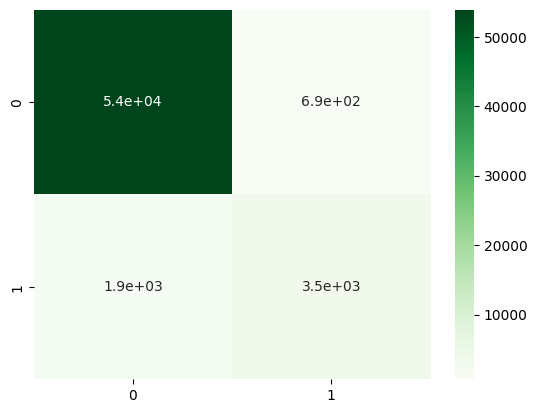

In [19]:
import seaborn as sns

# plot the confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.show()

Of course, the confusion matrix gives us a lot of information but if we are looking for a more concise metric, **precision** might be the right candidate. Precision is computed as follows:  
$$
\text{precision} = \frac{TP}{TP + FP}
$$
If we compute precision in our case:  

In [20]:
from sklearn.metrics import precision_score

# calculate the precision
precision = precision_score(y_train_5, y_train_pred)
print(round(float(precision), 4)*100, "%")

83.71 %


However, **precision** alone is not a bullet proof metric since one can easily inflate this number by using a model that only predicts a very small number of false positive (in our case, this means that we very seldomly predict that the class is `not_five`).  

 $\Rightarrow$ we always predict `True` 

In [21]:
y_true = np.array([True]*60000)
y_true

array([ True,  True,  True, ...,  True,  True,  True])

In [22]:
precision_only_trues = precision_score(y_true, y_train_pred)
print(round(float(precision), 4)*100, "%")

83.71 %


To avoid this, we often couple the **precision** metric with another one: the **recall**. The recall is computed as:  
$$
\text{recall} = \frac{TP}{TP + FN}
$$
and it represents the ratio of positive instances that are correctly classified by the classifier.
We can compute it for the case at hand: 

In [23]:
from sklearn.metrics import recall_score

# calculate the recall
recall = recall_score(y_train_5, y_train_pred)
print(round(float(recall), 4)*100, "%")

65.12 %


A recall of $65.12$ % means that we detect $65.12$ % of the fives present in the dataset. 

#### 2.2.4. Precision and Recall Mixed: The $F_1$ Score

Since it is essential to consider precision and recall together for a comprehensive evaluation, having a single metric that combines both is particularly useful for comparing models. This metric is known as the **$F_1$ score**:  
$$
F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$
Indeed, the $F_1$ score is the **harmonic mean** of the precision and the recall. Whereas the regular mean treats all values with an equal weight, the harmonic mean puts the emphasis on smaller values. As a result, the classifier will only get a high $F_1$ score if both recall and precision are high. 

If we compute it for our case: 

In [25]:
from sklearn.metrics import f1_score

# calculate the f1 score
f1 = f1_score(y_train_5, y_train_pred)
print(round(float(f1), 4))

0.7325


Furthermore, one should keep in mind that the $F_1$ score is absolutely not a must but simply an additional and (depending on the cases) useful metric. What's important to remember is that sometimes one will choose to either maximize the recall or to only maximize the precision. However, doing both at the same time is quite not possible. This is called the *precision/recall trade-off*.  

#### 2.2.5. The Precision/Recall Trade-off

test